**Global Terrorism**

ABHISHEK ZUNE

In [1]:
!pip install jovian -q --upgrade


     |████████████████████████████████| 68 kB 5.1 MB/s 


In [2]:
import numpy as np
import jovian
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import datasets
import warnings
warnings.filterwarnings("ignore")
import os
import mpl_toolkits
import json
print('Libraries are imported Successfully')

Libraries are imported Successfully


In [7]:
from google.colab import files
uploaded = files.upload()


Saving globalterrorismdb.csv to globalterrorismdb.csv


In [8]:
df=pd.read_csv('globalterrorismdb.csv',encoding='latin1')
print('Data Imported Successfully')


Data Imported Successfully


In [9]:
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,...,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,20

In [10]:
df.shape


(181691, 135)

In [11]:
usecols= [1, 5, 8, 10, 11, 12, 13, 14, 25, 26, 27, 29, 35, 58, 69, 71, 82, 98, 100, 101, 103, 104, 106]
renamescols= {
      'iyear': 'uyear',
       'country_txt' : 'country_txtt',
        'region_txt' : 'region_txtt',
         'latitude': 'lat',
          'longittude': 'long',
         'provstate':  'provsstate',
          'attacktype1_txt' : 'attackedtype1',
          'targtypet1_txt' : 'targettype1',
           'weaptype1_txt' :  'weapontype',
            'nperps' : 'nperhps',
             'nkill' : 'nkilled',
             'nkillter': 'nkilledter',
             'nwound' : 'nwounded',
             'nwondte': 'nwondedte',
              'propextent_txt' : 'propertyextent'
          
     
}

In [12]:
df =pd.read_csv('globalterrorismdb.csv',encoding= 'ISO-8859-1', usecols=usecols)
df.rename(columns=renamescols, inplace =True)
print('Data read Successfully')

Data read Successfully


In [13]:
df

,uyear,extended,country_txtt,region_txtt,provsstate,city,lat,longitude,multiple,success,suicide,attackedtype1,targtype1_txt,gname,nperhps,claimed,weapontype,nkilled,nkilledter,nwounded,nwoundte,property,propertyextent
0,1970,0,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,0.0,1,0,Assassination,Private Citizens & Property,MANO-D,NaN,NaN,Unknown,1.0,NaN,0.0,NaN,0,NaN
1,1970,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,0.0,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,7.0,NaN,Unknown,0.0,NaN,0.0,NaN,0,NaN
2,1970,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,0.0,1,0,Assassination,Journalists & Media,Unknown,NaN,NaN,Unknown,1.0,NaN,0.0,NaN,0,NaN
3,1970,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,0.0,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,NaN,Explosives,NaN,NaN,NaN,NaN,1,NaN
4,1970,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,0.0,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,0,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,0.0,1,0,Armed Assault,Military,Al-Shabaab,-99.0,1.0,Firearms,1.0,0.0,2.0,0.0,-9,NaN
181687,2017,0,Syria,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,0.0,1,0,Bombing/Explosion,Military,Muslim extremists,-99.0,0.0,Explosives,2.0,0.0,7.0,0.0,1,Unknown
181688,2017,0,Philippines,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,0.0,1,0,Facility/Infrastructure Attack,Private Citizens & Property,Bangsamoro Islamic Freedom Movement (BIFM),-99.0,0.0,Incendiary,0.0,0.0,0.0,0.0,1,Unknown
181689,2017,0,India,South Asia,Manipur,Imphal,24.798346,93.940430,0.0,0,0,Bombing/Explosion,Government (General),Unknown,-99.0,0.0,Explosives,0.0,0.0,0.0,0.0,-9,NaN


In [14]:
## Removing the unknowns values from the columnns
df=df[pd.notnull(df.lat)]
df=df[pd.notnull(df.longitude)]
print("Unknown values are removed from the columns")

Unknown values are removed from the columns


In [15]:
df.duplicated().sum()

21123

In [17]:
df.drop_duplicates(keep=False,inplace=True)
print('duplicated values have been removed')

duplicated values have been removed


In [18]:

df.isnull().sum()

uyear                 0
extended              0
country_txtt          0
region_txtt           0
provsstate          409
city                366
lat                   0
longitude             0
multiple              1
success               0
suicide               0
attackedtype1         0
targtype1_txt         0
gname                 0
nperhps           51729
claimed           47212
weapontype            0
nkilled            7555
nkilledter        48051
nwounded          12494
nwoundte          50093
property              0
propertyextent    94965
dtype: int64

In [19]:
df.fillna((0),inplace =True)


In [20]:
df.columns

Index(['uyear', 'extended', 'country_txtt', 'region_txtt', 'provsstate',
       'city', 'lat', 'longitude', 'multiple', 'success', 'suicide',
       'attackedtype1', 'targtype1_txt', 'gname', 'nperhps', 'claimed',
       'weapontype', 'nkilled', 'nkilledter', 'nwounded', 'nwoundte',
       'property', 'propertyextent'],
      dtype='object')

In [21]:
df.dtypes

uyear               int64
extended            int64
country_txtt       object
region_txtt        object
provsstate         object
city               object
lat               float64
longitude         float64
multiple          float64
success             int64
suicide             int64
attackedtype1      object
targtype1_txt      object
gname              object
nperhps           float64
claimed           float64
weapontype         object
nkilled           float64
nkilledter        float64
nwounded          float64
nwoundte          float64
property            int64
propertyextent     object
dtype: object

In [22]:
df.head(5)


,uyear,extended,country_txtt,region_txtt,provsstate,city,lat,longitude,multiple,success,suicide,attackedtype1,targtype1_txt,gname,nperhps,claimed,weapontype,nkilled,nkilledter,nwounded,nwoundte,property,propertyextent
0,1970,0,Dominican Republic,Central America & Caribbean,0,Santo Domingo,18.456792,-69.951164,0.0,1,0,Assassination,Private Citizens & Property,MANO-D,0.0,0.0,Unknown,1.0,0.0,0.0,0.0,0,0
1,1970,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,0.0,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,7.0,0.0,Unknown,0.0,0.0,0.0,0.0,0,0
2,1970,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,0.0,1,0,Assassination,Journalists & Media,Unknown,0.0,0.0,Unknown,1.0,0.0,0.0,0.0,0,0
3,1970,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,0.0,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,0.0,0.0,Explosives,0.0,0.0,0.0,0.0,1,0
4,1970,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,0.0,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,0.0,0.0,Incendiary,0.0,0.0,0.0,0.0,1,0


In [23]:
df.tail(5)


,uyear,extended,country_txtt,region_txtt,provsstate,city,lat,longitude,multiple,success,suicide,attackedtype1,targtype1_txt,gname,nperhps,claimed,weapontype,nkilled,nkilledter,nwounded,nwoundte,property,propertyextent
181686,2017,0,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,0.0,1,0,Armed Assault,Military,Al-Shabaab,-99.0,1.0,Firearms,1.0,0.0,2.0,0.0,-9,0
181687,2017,0,Syria,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,0.0,1,0,Bombing/Explosion,Military,Muslim extremists,-99.0,0.0,Explosives,2.0,0.0,7.0,0.0,1,Unknown
181688,2017,0,Philippines,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,0.0,1,0,Facility/Infrastructure Attack,Private Citizens & Property,Bangsamoro Islamic Freedom Movement (BIFM),-99.0,0.0,Incendiary,0.0,0.0,0.0,0.0,1,Unknown
181689,2017,0,India,South Asia,Manipur,Imphal,24.798346,93.940430,0.0,0,0,Bombing/Explosion,Government (General),Unknown,-99.0,0.0,Explosives,0.0,0.0,0.0,0.0,-9,0
181690,2017,0,Philippines,Southeast Asia,Maguindanao,Cotabato City,7.209594,124.241966,0.0,0,0,Bombing/Explosion,Unknown,Unknown,-99.0,0.0,Explosives,0.0,0.0,0.0,0.0,0,0


In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 146986 entries, 0 to 181690
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   uyear           146986 non-null  int64  
 1   extended        146986 non-null  int64  
 2   country_txtt    146986 non-null  object 
 3   region_txtt     146986 non-null  object 
 4   provsstate      146986 non-null  object 
 5   city            146986 non-null  object 
 6   lat             146986 non-null  float64
 7   longitude       146986 non-null  float64
 8   multiple        146986 non-null  float64
 9   success         146986 non-null  int64  
 10  suicide         146986 non-null  int64  
 11  attackedtype1   146986 non-null  object 
 12  targtype1_txt   146986 non-null  object 
 13  gname           146986 non-null  object 
 14  nperhps         146986 non-null  float64
 15  claimed         146986 non-null  float64
 16  weapontype      146986 non-null  object 
 17  nkilled   

In [25]:
df.nunique()


uyear                47
extended              2
country_txtt        204
region_txtt          12
provsstate         2823
city              34807
lat               47873
longitude         47588
multiple              2
success               2
suicide               2
attackedtype1         9
targtype1_txt        22
gname              3401
nperhps             109
claimed               3
weapontype           12
nkilled             201
nkilledter           96
nwounded            238
nwoundte             44
property              3
propertyextent        5
dtype: int64

In [26]:
df['uyear'].unique()


array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017])

In [27]:
df['uyear'].value_counts()


2014    14303
2015    12449
2016    11060
2013    10435
2017     9665
2012     7604
2008     4333
2009     4169
2011     4167
2010     4103
1992     3753
1991     3236
1989     3163
2007     2925
1988     2792
1994     2637
1990     2572
2006     2542
1984     2279
1997     2267
1983     2166
1996     2146
1987     2085
1981     2021
1980     1998
1995     1998
1982     1961
1979     1949
1986     1946
1985     1923
2005     1901
2001     1782
2000     1643
2002     1244
1999     1239
1978     1205
2003     1186
2004     1104
1977      986
1998      826
1976      688
1975      575
1970      518
1974      424
1971      366
1973      349
1972      303
Name: uyear, dtype: int64

In [28]:
df['region_txtt'].value_counts()


South Asia                     39971
Middle East & North Africa     39491
Sub-Saharan Africa             15423
South America                  12978
Western Europe                 12285
Southeast Asia                 10980
Central America & Caribbean     6995
Eastern Europe                  4599
North America                   2879
East Asia                        628
Central Asia                     498
Australasia & Oceania            259
Name: region_txtt, dtype: int64

In [29]:
df['city'].value_counts()


Unknown        5760
Baghdad        4106
Karachi        1493
Mosul          1455
Mogadishu      1250
               ... 
Bessemer          1
Gogai Kanda       1
Chernihiv         1
Puswada           1
Mankhar           1
Name: city, Length: 34807, dtype: int64

In [30]:
df['attackedtype1'].value_counts()


Bombing/Explosion                      67298
Armed Assault                          36845
Assassination                          16348
Hostage Taking (Kidnapping)            10018
Facility/Infrastructure Attack          7878
Unknown                                 6303
Hostage Taking (Barricade Incident)      846
Unarmed Assault                          844
Hijacking                                606
Name: attackedtype1, dtype: int64

In [31]:
df['targtype1_txt'].value_counts()


Private Citizens & Property       34737
Military                          24514
Police                            21594
Government (General)              17536
Business                          14623
Transportation                     5309
Unknown                            4096
Religious Figures/Institutions     3875
Educational Institution            3497
Government (Diplomatic)            3128
Utilities                          2896
Terrorists/Non-State Militia       2778
Journalists & Media                2541
Violent Political Party            1644
Airports & Aircraft                1226
NGO                                 908
Telecommunication                   809
Tourists                            397
Maritime                            285
Food or Water Supply                266
Abortion Related                    203
Other                               124
Name: targtype1_txt, dtype: int64

In [32]:
df.describe()


,uyear,extended,lat,longitude,multiple,success,suicide,nperhps,claimed,nkilled,nkilledter,nwounded,nwoundte,property
count,146986.000000,146986.000000,146986.000000,1.469860e+05,146986.000000,146986.000000,146986.000000,146986.000000,146986.000000,146986.000000,146986.000000,146986.000000,146986.000000,146986.000000
mean,2003.593499,0.050590,23.688252,-5.548676e+02,0.086716,0.886499,0.043460,-42.688957,0.033398,2.578225,0.383615,3.312159,0.079967,-0.596417
std,12.936236,0.219159,17.899265,2.248011e+05,0.281419,0.317205,0.203891,108.563825,0.934334,12.194752,3.697621,38.061657,1.298710,3.148533
min,1970.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,-99.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,-9.000000
25%,1992.000000,0.000000,11.400638,8.808213e+00,0.000000,1.000000,0.000000,-99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2010.000000,0.000000,31.322677,4.376645e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2014.000000,0.000000,34.621521,6.980546e+01,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,1.000000
max,2017.000000,1.000000,74.633553,1.793667e+02,1.000000,1.000000,1.000000,25000.000000,1.000000,1570.000000,500.000000,8191.000000,200.000000,1.000000


In [33]:
df.corr()


,uyear,extended,lat,longitude,multiple,success,suicide,nperhps,claimed,nkilled,nkilledter,nwounded,nwoundte,property
uyear,1.000000,0.087284,0.139096,0.004487,0.193094,-0.057795,0.137812,-0.311391,0.078669,0.015626,0.073930,0.011551,0.048757,-0.248604
extended,0.087284,1.000000,-0.030879,0.000609,0.003550,0.078878,-0.041591,-0.028576,0.008195,0.011553,0.009054,-0.011720,0.003929,0.001607
lat,0.139096,-0.030879,1.000000,0.001662,0.016759,-0.060591,0.074789,-0.075284,0.018524,-0.018130,0.013955,0.015584,0.024175,-0.067313
longitude,0.004487,0.000609,0.001662,1.000000,0.000824,-0.000942,0.000571,-0.001061,0.000097,-0.000520,0.000278,0.000231,0.000168,-0.001360
multiple,0.193094,0.003550,0.016759,0.000824,1.000000,0.011408,0.063561,-0.065299,0.050722,0.029170,0.033471,0.025853,0.017624,-0.079118
success,-0.057795,0.078878,-0.060591,-0.000942,0.011408,1.000000,-0.029239,0.025294,-0.004817,0.052270,-0.022147,0.024457,-0.014449,-0.037473
suicide,0.137812,-0.041591,0.074789,0.000571,0.063561,-0.029239,1.000000,0.057148,0.038451,0.133932,0.100651,0.094581,0.005092,-0.073900
nperhps,-0.311391,-0.028576,-0.075284,-0.001061,-0.065299,0.025294,0.057148,1.000000,-0.053815,0.032582,0.008837,0.017312,-0.001160,0.083877
claimed,0.078669,0.008195,0.018524,0.000097,0.050722,-0.004817,0.038451,-0.053815,1.000000,0.013441,0.028469,0.005461,0.021594,0.040990
nkilled,0.015626,0.011553,-0.018130,-0.000520,0.029170,0.052270,0.133932,0.032582,0.013441,1.000000,0.351714,0.449810,0.110741,-0.014897


In [34]:
df.iloc[0]


uyear                                    1970
extended                                    0
country_txtt               Dominican Republic
region_txtt       Central America & Caribbean
provsstate                                  0
city                            Santo Domingo
lat                                   18.4568
longitude                            -69.9512
multiple                                    0
success                                     1
suicide                                     0
attackedtype1                   Assassination
targtype1_txt     Private Citizens & Property
gname                                  MANO-D
nperhps                                     0
claimed                                     0
weapontype                            Unknown
nkilled                                     1
nkilledter                                  0
nwounded                                    0
nwoundte                                    0
property                          

In [35]:
df.iloc[:,1]


0         0
1         0
2         0
3         0
4         0
         ..
181686    0
181687    0
181688    0
181689    0
181690    0
Name: extended, Length: 146986, dtype: int64

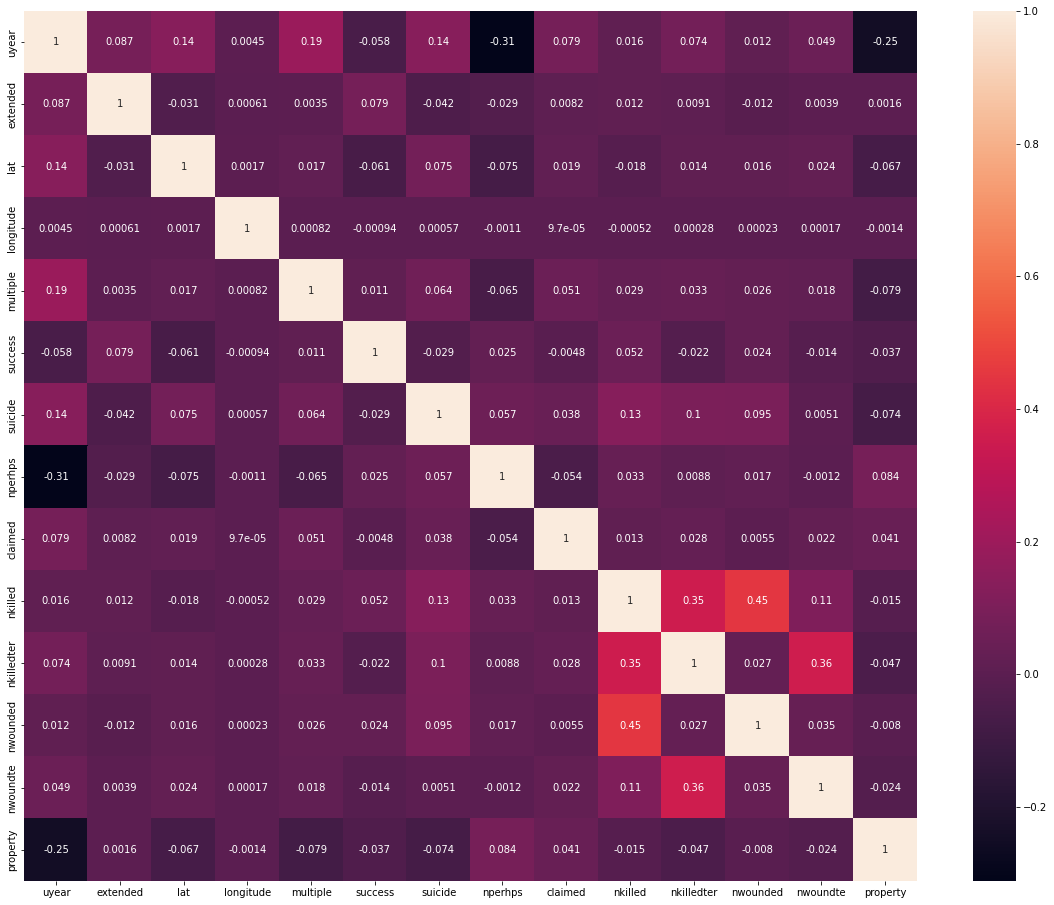

In [36]:
fig,axes = plt.subplots(1,1,figsize=(20,16))
sns.heatmap(df.corr(), annot =True)
plt.show()

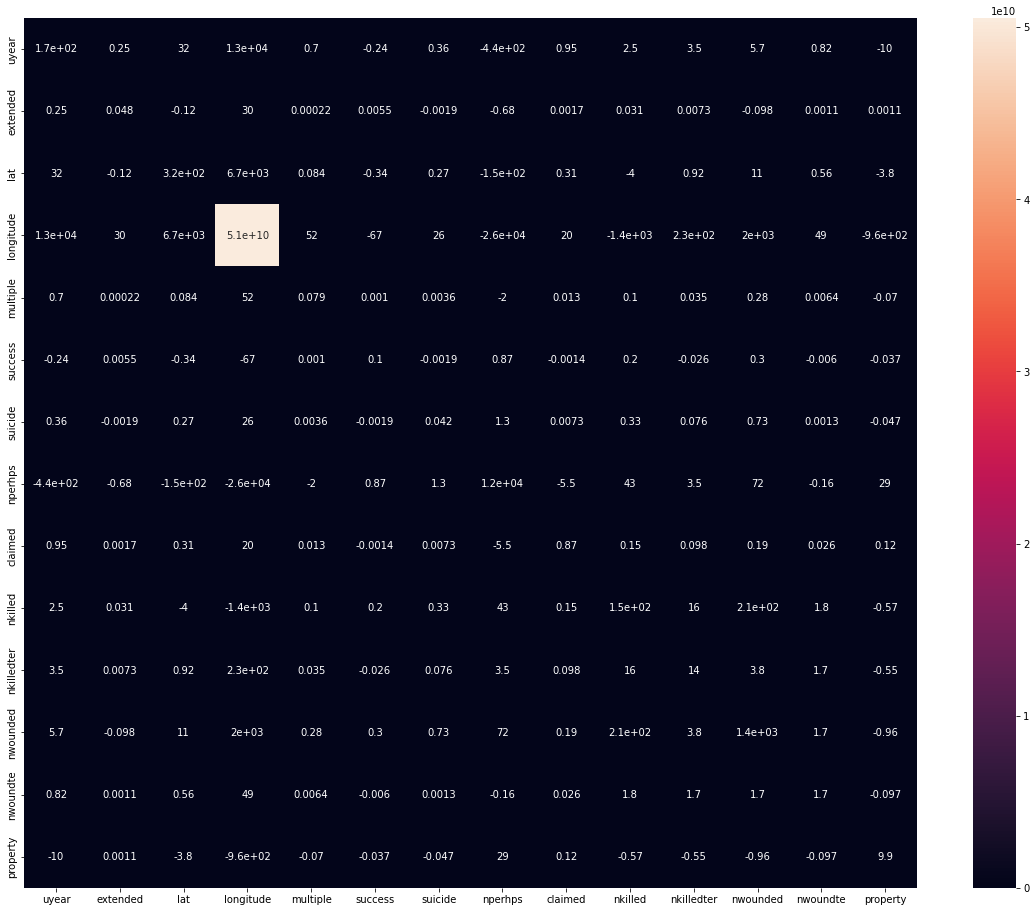

In [37]:
fig,axes = plt.subplots(1,1,figsize=(20,16))
sns.heatmap(df.cov(), annot =True)
plt.show()


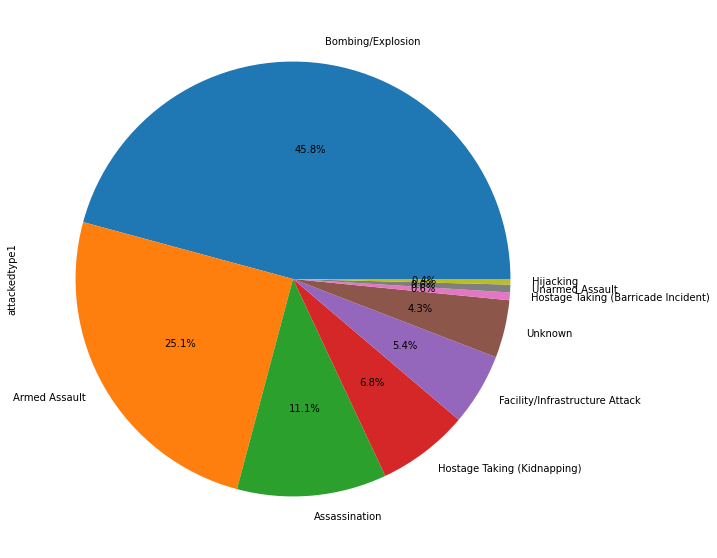

In [38]:
plt.figure(figsize=(10,10))
df['attackedtype1'].value_counts().plot.pie(autopct ="%1.1f%%")
plt.show()

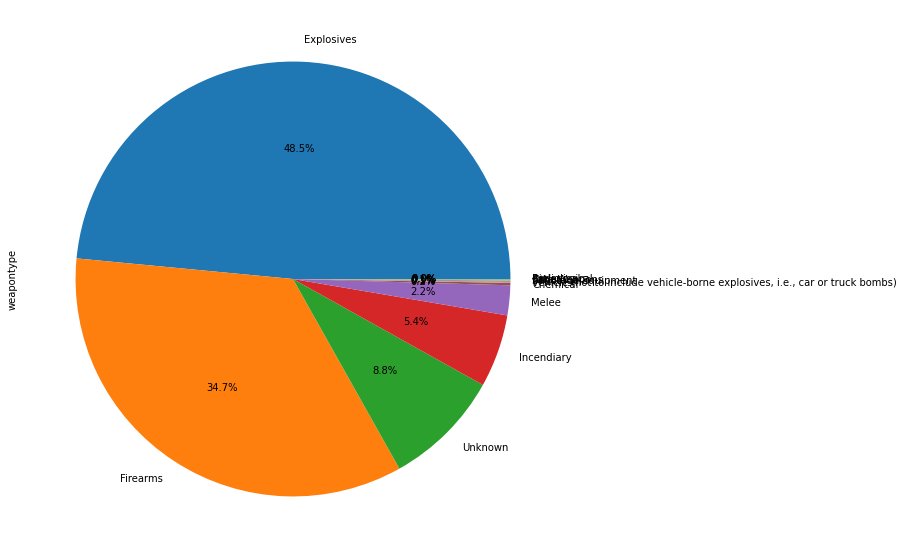

In [39]:
plt.figure(figsize=(10,10))
df['weapontype'].value_counts().plot.pie(autopct ="%1.1f%%")
plt.show()

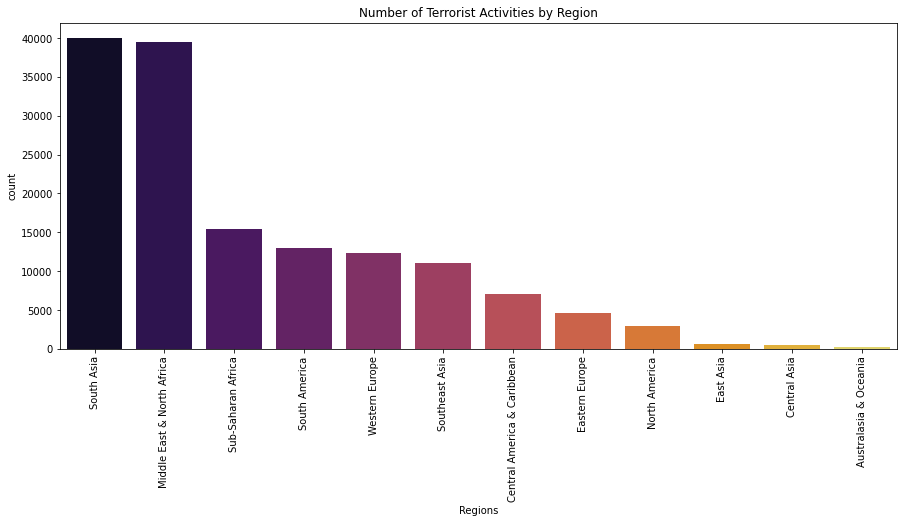

In [40]:
plt.subplots(figsize =(15,6))
sns.countplot('region_txtt',data=df,palette='inferno',order=df['region_txtt'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Regions')
plt.title('Number of Terrorist Activities by Region')
plt.show()

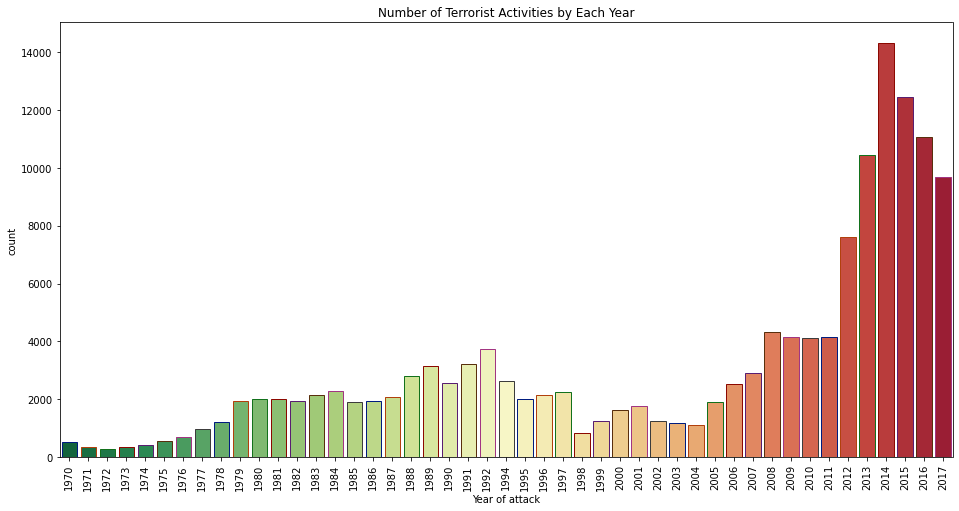

In [41]:
plt.subplots(figsize =(16,8))
sns.countplot('uyear',data=df,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',8))
plt.xticks(rotation=90)
plt.xlabel('Year of attack')
plt.title('Number of Terrorist Activities by Each Year')
plt.show()

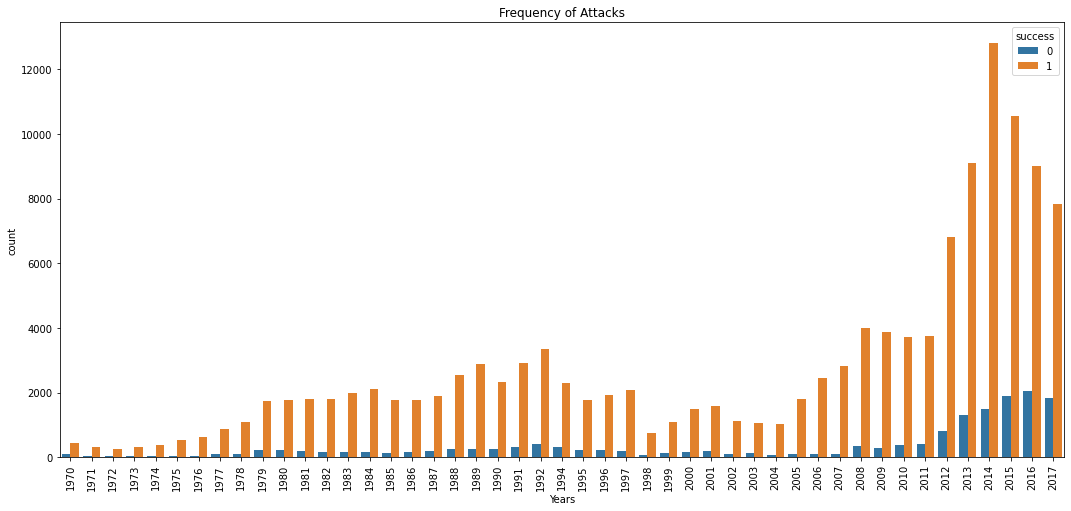

In [42]:
plt.subplots(figsize =(18,8))
sns.countplot(x=df['uyear'], hue ='success', data = df)
plt.xticks(rotation=90)
plt.xlabel('Years')
plt.title('Frequency of Attacks')
plt.show()


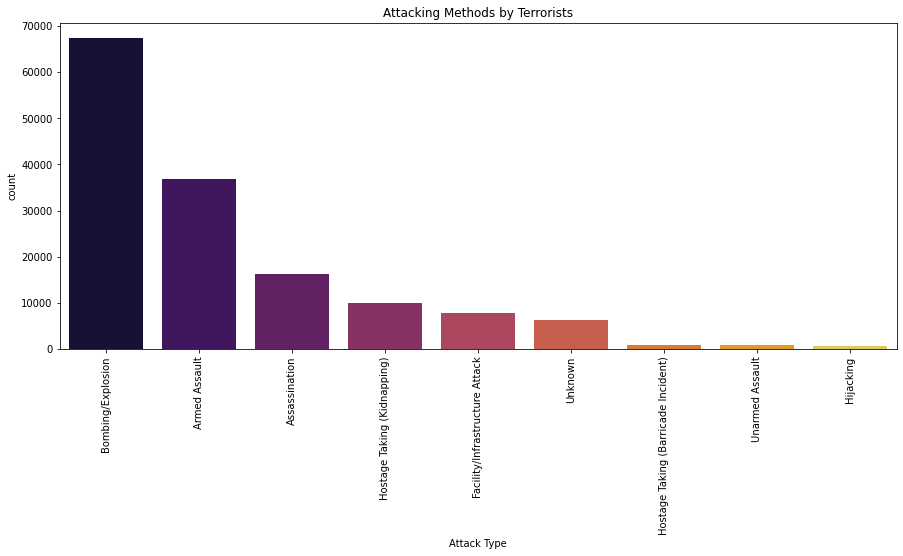

In [43]:
plt.subplots(figsize =(15,6))
sns.countplot('attackedtype1',data=df,palette='inferno',order=df['attackedtype1'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Attack Type')
plt.title('Attacking Methods by Terrorists')
plt.show()

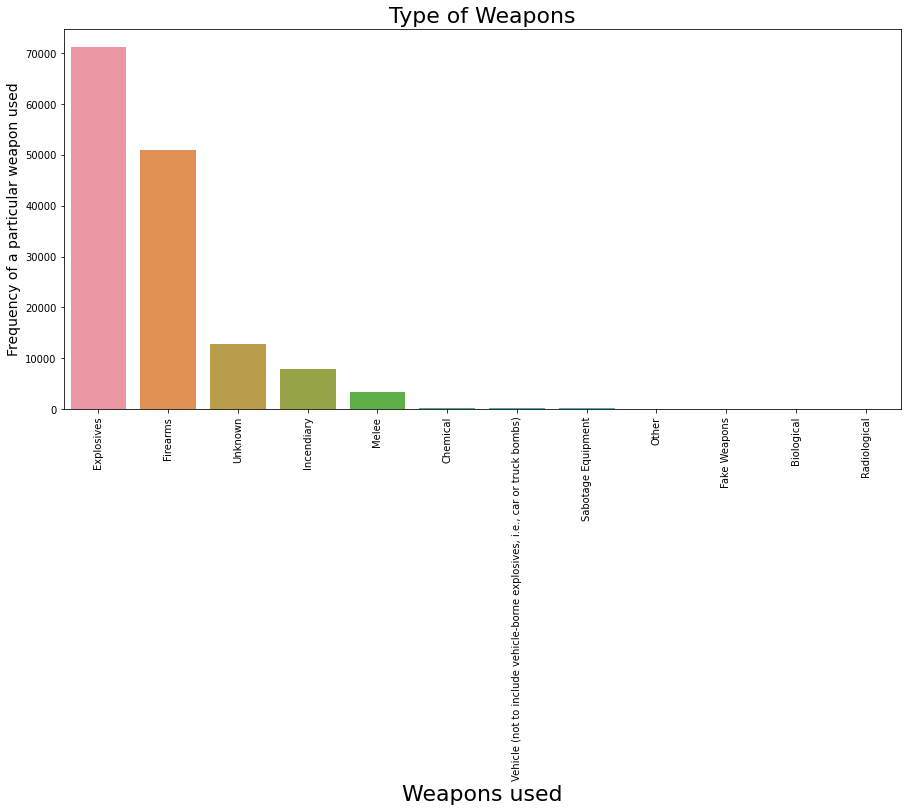

In [44]:
plt.figure(figsize =(15,7))
sns.barplot(x=df['weapontype'].value_counts()[:50].index,y =df['weapontype'].value_counts()[:50].values)
plt.xticks(rotation=90)
plt.xlabel('Weapons used', fontsize =22)
plt.ylabel("Frequency of a particular weapon used", fontsize =14)
plt.title("Type of Weapons", fontsize =22)
plt.show()


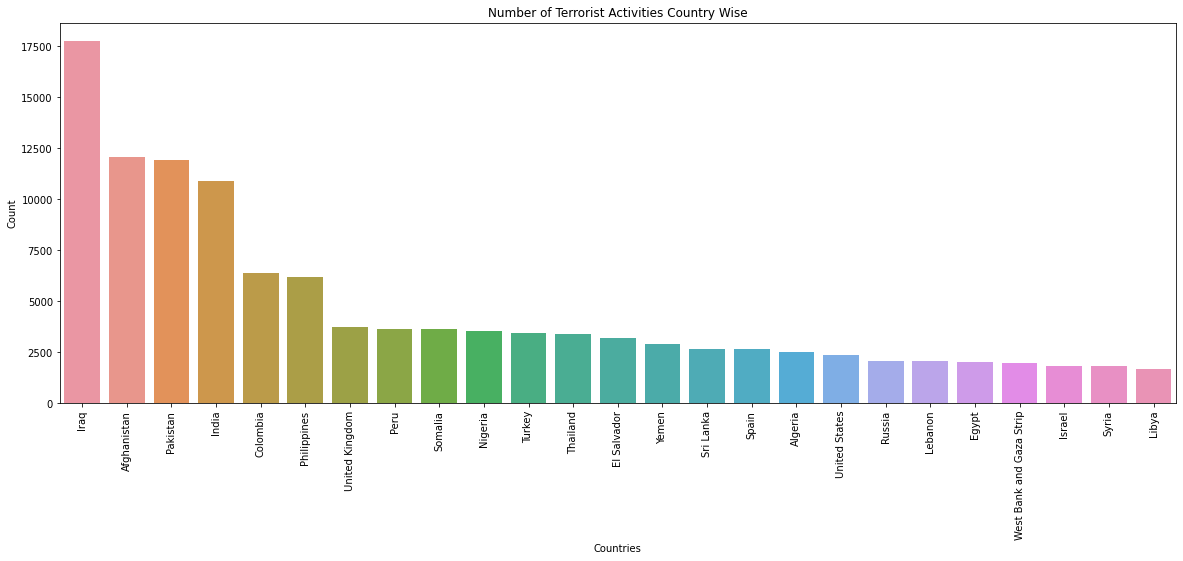

In [45]:
plt.figure(figsize =(20,7))
sns.barplot(x=df['country_txtt'].value_counts()[:25].index,y =df['country_txtt'].value_counts()[:25].values)
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title("Number of Terrorist Activities Country Wise")
plt.show()

Text(0.5, 1.0, 'Number of Terrorist Activities Regionwise')

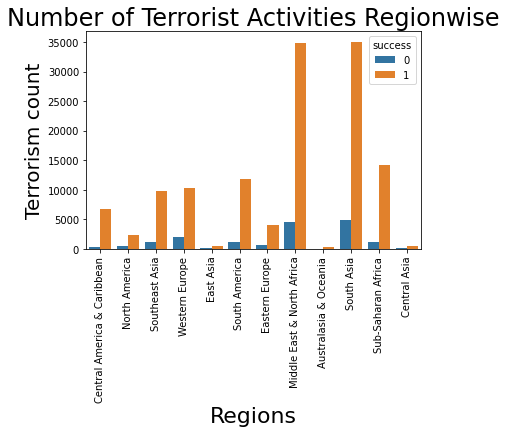

In [46]:
sns.countplot(x=df['region_txtt'], hue ='success', data=df)
plt.xlabel("Regions", fontsize =22)
plt.xticks(rotation=90)
plt.ylabel("Terrorism count", fontsize =20)
plt.title("Number of Terrorist Activities Regionwise", fontsize =24)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc825e4b110>,
      dtype=object)

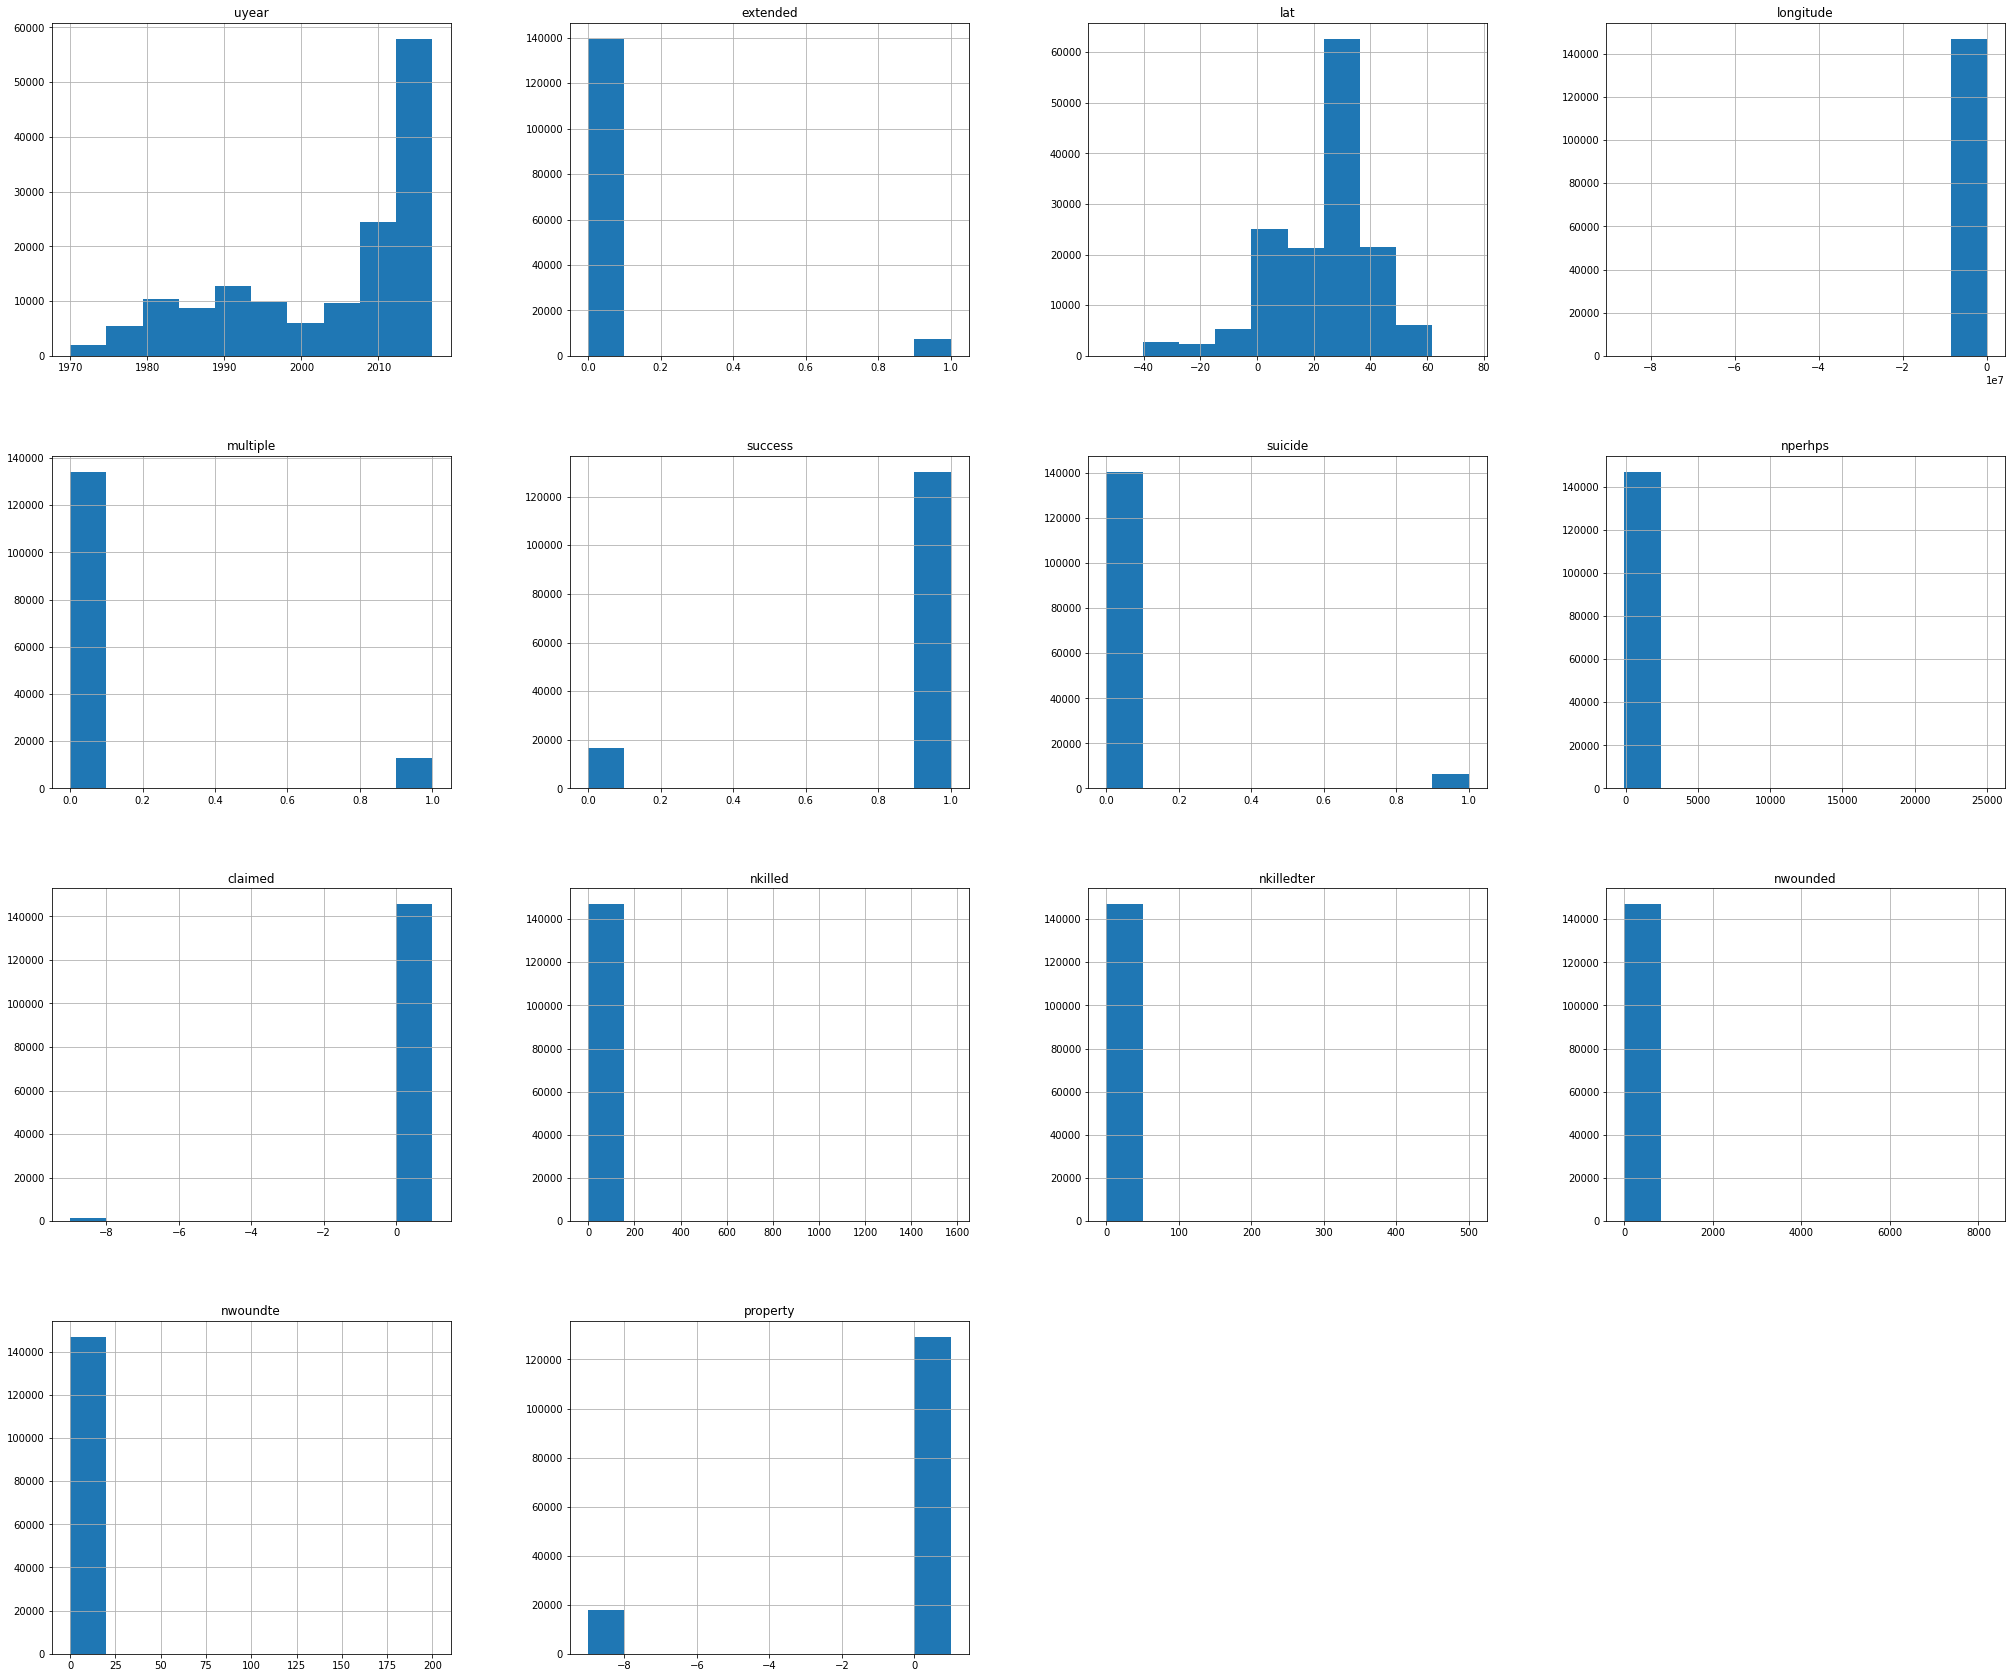

In [47]:
df.hist(figsize =(35,30))


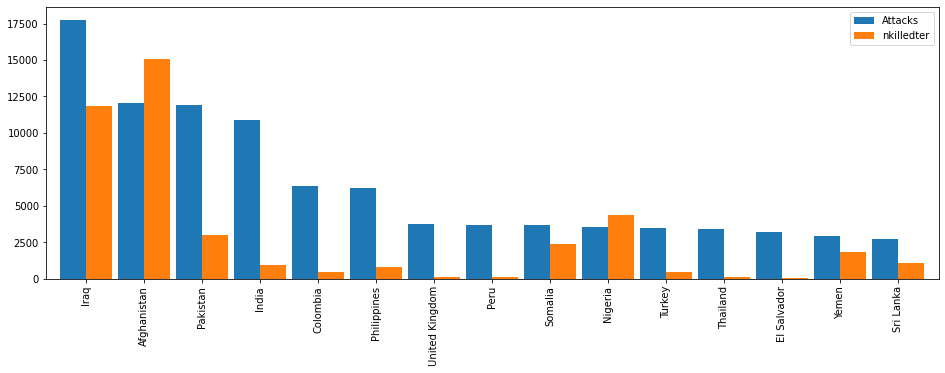

In [48]:
count_terror =df['country_txtt'].value_counts()[:15].to_frame()
count_terror.columns=['Attacks']
count_kill =df.groupby('country_txtt')['nkilledter'].sum().to_frame()
count_terror.merge(count_kill,left_index =True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(16,5)
plt.show()